In [1]:
## Import the packages
from utils import CleanData
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from googletrans import Translator



## PartI: Cleaning the data
### Clean the data and save it into data/clean_data.csv
For doing this, we create a class called "CleanData"

In [2]:

# Apply the clean method to the data
data = json.load(open('./data/trending.json', encoding="utf8"))
data = data['collector']
df = pd.json_normalize(data)
clean_data = CleanData(df)
clean_data.process_the_data()
clean_data.summary_of_data()
df_clean = clean_data.save_cleaned_data()


Missing Data:
None

Data Time Period:
Start Date: 2020-09-22 14:22:38
  End Date: 2020-12-21 03:18:36
 Timedelta: 89 days 12:55:58


## PartII: Draw the circular bar chart
Use circular bar chart to show the distribution of the like rate, comment rate, and share rate. And segment the graph into 4 sections.

In [3]:
# define the function to draw the bar chart
def draw_circular_bar(ax, x, y, title, lower_limit, curve_position, text_position,max_value_list=[]):
    ax.set_theta_direction(-1)
    ax.set_xticks(np.arange(0, 2*np.pi, np.pi/2))
    ax.set_xticklabels(["60s", "15s", "30s", "45s"])
    ax.set_theta_zero_location('N')
    for _x, _y in zip(x, y):
        # _x = _x + np.pi/30
        _x_second = _x
        _x = _x*np.pi/30
        if _x <= np.pi/2:
            ax.bar(x=_x, height=_y, width=np.pi/30,
                   color='#fcbcbb', bottom=lower_limit,edgecolor='white')
        elif _x > np.pi/2 and _x <= np.pi:
            ax.bar(x=_x, height=_y, width=np.pi/30,
                   color='#c2d794', bottom=lower_limit,edgecolor='white')
        elif _x > np.pi and _x <= np.pi*3/2:
            ax.bar(x=_x, height=_y, width=np.pi/30,
                   color='#99dee1', bottom=lower_limit,edgecolor='white')
        else:
            ax.bar(x=_x, height=_y, width=np.pi/30,
                   color='#e3bfff', bottom=lower_limit,edgecolor='white')
        if _x_second in max_value_list:
            if _x_second <= 30:
                ax.text((_x_second-0.25)/30*np.pi, _y+lower_limit*1.1,rotation=-np.rad2deg((_x_second-0.25)/30*np.pi+np.pi/2*3),s ="{:.3%}".format(_y),size=8 ,ha = "left",rotation_mode='anchor',va="center") #TODO
            else:
                ax.text((_x_second-0.25)/30*np.pi, _y+lower_limit*1.1,rotation=-np.rad2deg((_x_second-0.25)/30*np.pi+np.pi/2),s ="{:.3%}".format(_y),size=8 ,ha ="right",rotation_mode='anchor',va ="center") #TODO
        
    # draw the curve
    x = np.linspace(np.pi/30+0.1*np.pi, np.pi/2, 100)
    y = np.full(len(x), curve_position)
    ax.plot(x, y, color='black', linewidth=1, alpha=0.8)  # draw the curve
    # ax.text(x=np.pi/4, y=0.000774233508826262, s="<15s",ha="left",
    #         va='center',
    #         rotation=np.pi/4,
    #         rotation_mode="anchor")
    ax.text(x=np.pi/2-np.pi/12, y=text_position, s='<15 s', rotation=-
            54, rotation_mode='anchor', va='center', ha='right', size=8)
    # # curve between 15s to 30s
    x = np.linspace(np.pi/2 + np.pi/30, np.pi, 100)
    y = np.full(len(x), curve_position)
    ax.plot(x, y, color='black', linewidth=1, alpha=0.8)  # draw the curve
    ax.text(x=np.pi-np.pi/10, y=text_position, s='15-30 s', rotation=-
            144, rotation_mode='anchor', va='center', ha='right', size=8)
    # # curve between 30s to 45s
    x = np.linspace(np.pi + np.pi/30, 3*np.pi/2, 100)
    y = np.full(len(x), curve_position)
    ax.plot(x, y, color='black', linewidth=1, alpha=0.8)  # draw the curve
    ax.text(x=np.pi + np.pi/10, y=text_position, s='31-45 s', rotation=144,
            rotation_mode='anchor', va='center', ha='left', size=8)
    # # curve between 45s to 60s
    x = np.linspace(3*np.pi/2+np.pi/30, 2*np.pi, 100)
    y = np.full(len(x), curve_position)
    ax.plot(x, y, color='black', linewidth=1, alpha=0.8)  # draw the curve
    ax.text(x=3*np.pi/2 + np.pi/10, y=text_position, s='46-60 s',
            rotation=54, rotation_mode='anchor', va='center', ha='left', size=8)
    # add title
    # remove the axis
    ax.set_xticks([])
    ax.set_title(title, fontsize=16)
    ax.axis('off')


In [4]:
# groupby the data by the video duration
avg_df = df_clean[['videoMeta.duration',
                   'likeRate', 'shareRate', 'commentRate']]
avg_df = avg_df.groupby(['videoMeta.duration'], as_index=False).agg(
    [np.mean]).reset_index()
avg_df.columns = avg_df.columns.droplevel(-1)


In [5]:
# set the fig
fig1 = plt.figure(figsize=(16, 9), constrained_layout=True)
ax1 = fig1.add_subplot(131, projection='polar')
ax2 = fig1.add_subplot(132, projection='polar')
ax3 = fig1.add_subplot(133, projection='polar')


# draw the bar chart
draw_circular_bar(ax1, avg_df["videoMeta.duration"],
                  avg_df["shareRate"], "Share Rate", 0.003, 0.003,0.0025,[14,27,32,50])
draw_circular_bar(ax2, avg_df["videoMeta.duration"],
                  avg_df["likeRate"], "Like Rate", 0.098, 0.098,0.076,[12,23,32,49])
draw_circular_bar(ax3, avg_df["videoMeta.duration"],
                  avg_df["commentRate"], "Comment Rate", 0.0025, 0.0025,0.002,[11,19,42,53])
plt.axis('off')
fig1.savefig("figure/rate_according_to_video_length.png", dpi=300)    
plt.show()

KeyboardInterrupt: 

## PartIII: Draw the vlines
The vlines graph shows the popularity influenced by whether it is original sound and first poster.
### *May not be used if you cannot install the requirements.txt successfully*

In [7]:
# Generate the data
# We used google translator to translate the music name to English, and put it into the colum called `translated_lang`



# translator = Translator()
# translated_lang = []
# for ind,row in  df_clean.iterrows():
#     try:
#         _lang = translator.translate(row["musicMeta.musicName"]).text
#         translated_lang.append(_lang)
#     except Exception:
#         translated_lang.append(None)
#     print(f"{ind}:{_lang}")
# df_clean["translated_lang"] = translated_lang
# print("finished")

0:Element
1:Without Me
2:Pilfingerdansen - Remix
3:Justin Timberlake - Mirrors
4:Original sound
5:Diamonds
6:original sound
7:original sound
8:Believer
9:Snort laugh
10:WITHOUT YOU
11:original sound
12:Jailhouse Rock
13:Street Fashion Game
14:original sound
15:as original
16:Original
17:original sound - 🌸Ri Za🌸
18:original sound
19:ruin our friendship
20:original sound
21:Original Sound
22:Blow Your Mind (Mwah Challenge)
23:original sound
24:Everybody Makes Mistakes
25:hometown slowed down twenty one pilots
26:DUMB DUMB
27:Original sound
28:Oh No
29:original sound


KeyboardInterrupt: 

In [8]:
# Proprocess the column
# Because there may be some environments conflict when applying the translator packages, in order to avoid error, we directly read the processed data
df = pd.read_csv("data/new_dfm.csv")
df["translated_lang"] = df["translated_lang"].astype(
    str)
df["translated_lang"] = df["translated_lang"].apply(
    lambda x: x.lower())
df["original_sound"] = df["translated_lang"].apply(lambda x: True if "original" in  x else False)
df["first_audio"] = df["musicMeta.musicOriginal"]

filter_df = df[["first_audio","original_sound",'shareRate','likeRate','commentRate']]
filter_df.loc[:,'first_audio'] = filter_df.loc[:,'first_audio'].replace(1,True).replace(0,False)

pivot_df = filter_df.groupby(['first_audio','original_sound'],as_index=False).size().rename(columns={"size": "videos_count"})
agg_df = filter_df.groupby(['first_audio','original_sound'],as_index=False).agg([np.mean])
pivot_df['avg_share_rate'] = agg_df.reset_index()['shareRate'][['mean']]
pivot_df['avg_like_rate'] = agg_df.reset_index()['likeRate'][['mean']]
pivot_df['avg_comment_rate'] = agg_df.reset_index()['commentRate'][['mean']]





/home/tiresias/anaconda3/envs/dv_mtp/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [9]:
# Define the function to draw the vline chart

def get_music_data(pivot_df, rate_type, places=2):
    tt = round(float(pivot_df[(pivot_df['original_sound'] == True) & (pivot_df['first_audio'] == True)][rate_type]),places)
    tf = round(float(pivot_df[(pivot_df['original_sound'] == True) & (pivot_df['first_audio'] == False)][rate_type]),places)
    ft = round(float(pivot_df[(pivot_df['original_sound'] == False) & (pivot_df['first_audio'] == True)][rate_type]),places)
    ff = round(float(pivot_df[(pivot_df['original_sound'] == False) & (pivot_df['first_audio'] == False)][rate_type]),places)
    return [tt, tf, ft, ff]

def plot_lolipop(ax,rate_data,title,ylim,legend=False):
    tt = rate_data[0]
    tf = rate_data[1]
    ft = rate_data[2]
    ff = rate_data[3]
    ori_sound_color = 'navy'; music_color = 'firebrick'

    x = np.arange(11)
    y1 = [-5,-5]+[tt]+[-5,-5,-5]+[ft]+[-5,-5,-5,-5]
    y2 = [-5,-5,-5]+[tf]+[-5,-5,-5]+[ff]+[-5,-5,-5]
    height1 = [tt, ft]
    height2 = [tf, ff]    
    annotate = ['','',tt,tf,'','',ft,ff,'','','']

    # plot data
    ax.scatter(x, y1, marker='o', color=ori_sound_color,edgecolors='w')
    for i, txt in enumerate(annotate):
        ax.annotate(str(txt), (x[i], y1[i] + (y1[i]/25)), fontsize=10, horizontalalignment='right')
    ax.scatter(x, y2, marker='o', color=music_color,edgecolors='w')
    for i, txt in enumerate(annotate):
        ax.annotate(str(txt), (x[i], y2[i] + (y2[i]/25)), fontsize=10, horizontalalignment='left')

    ax.vlines(x=[2,6], ymin=0, ymax=height1, color=ori_sound_color,
            alpha=0.7, linewidth=1)
    ax.vlines(x=[3,7], ymin=0, ymax=height2, color=music_color,
            alpha=0.7, linewidth=1)

    # aesthetic changes
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_ylim(0,ylim)
    ax.axes.get_yaxis().set_visible(False)
    ax.tick_params(bottom=False, left=False)
    ax.set_xticks(np.arange(0, 10, 0.5))
    ax.set_xticklabels(['','','','','','Original Sound','','','','','','','','Music','','','','','',''])

    if legend == True:
        ax.legend(labels=['1st Upload','Not 1st Upload'],loc='upper right',fontsize=10)
    ax.set_title(title, y=-0.2)

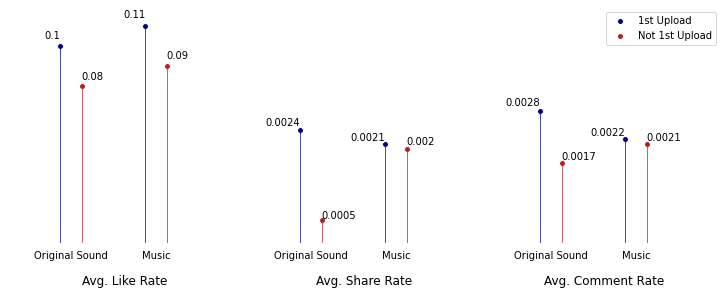

In [10]:
# figure
fig = plt.figure(figsize=(10, 4), constrained_layout=True)

# add plot
ax1 = fig.add_subplot(131)
plot_lolipop(ax1, get_music_data(pivot_df, 'avg_like_rate'),'Avg. Like Rate',0.12)

ax2 = fig.add_subplot(132)
plot_lolipop(ax2, get_music_data(pivot_df, 'avg_share_rate',4),'Avg. Share Rate',0.005)

ax3 = fig.add_subplot(133)
plot_lolipop(ax3, get_music_data(pivot_df, 'avg_comment_rate',4),'Avg. Comment Rate',0.005,legend=True)
fig.savefig("./figure/line_chart.png")
plt.show()

In [15]:
get_music_data(pivot_df, 'avg_like_rate')

[0.1, 0.06, 0.1, 0.09]

## PartIV: Draw the scatter plot
The scatter plot show the play count trend over time

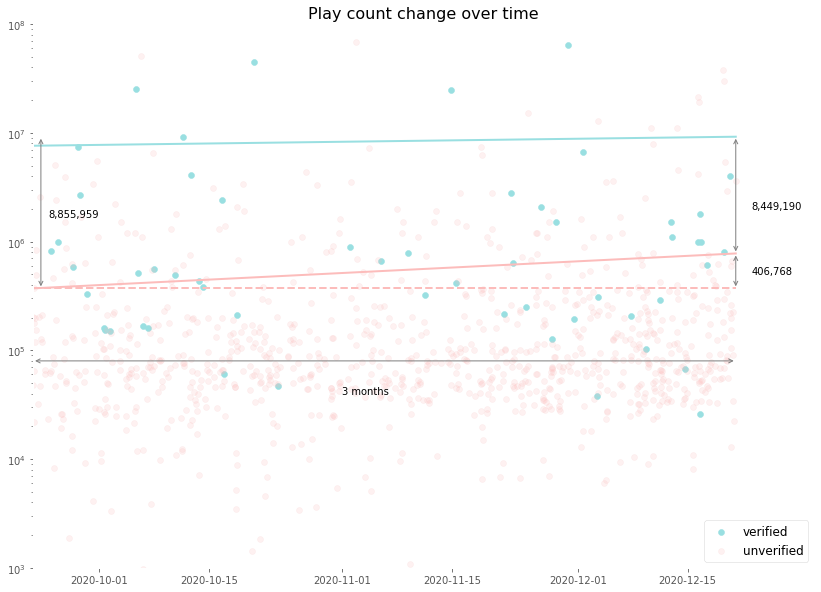

In [70]:
# PartIV: Draw the scatter plot

# add fig
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_facecolor((1, 1, 1))


In [ ]:
# select the data and draw the scatter plot
dfm_verified = df_clean[df_clean["authorMeta.verified"] == True]
dfm_unverified = df_clean[df_clean["authorMeta.verified"] == False]
ax.scatter(pd.to_datetime(dfm_verified["createTime"], unit="s"),
           dfm_verified["playCount"], color="#99dfe1", label="verified")
ax.scatter(pd.to_datetime(dfm_unverified["createTime"], unit="s"),
           dfm_unverified["playCount"], color="#fcbcbb", alpha=0.2, label="unverified")




In [ ]:
# draw the fitting the line of verified video
X = dfm_verified["createTime"].apply(lambda x: x.timestamp())
Y = dfm_verified["playCount"]
slope, intercept = np.polyfit(X, Y, 1)
x = [pd.to_datetime(dfm_unverified["createTime"], unit="s").min(
), pd.to_datetime(dfm_unverified["createTime"], unit="s").max()]
y_temp = X*slope + intercept
y = [y_temp.min(), y_temp.max()]
verified_y_max = y[-1]
ax.plot(x, y, '#99dfe1', linewidth=2, alpha=1)

# draw the fitting the line of unverified video
X = dfm_unverified["createTime"].apply(lambda x: x.timestamp())
Y = dfm_unverified["playCount"]
slope, intercept = np.polyfit(X, Y, 1)
x = [pd.to_datetime(dfm_unverified["createTime"], unit="s").min(
), pd.to_datetime(dfm_unverified["createTime"], unit="s").max()]
y_temp = X*slope + intercept
y = [y_temp.min(), y_temp.max()]
ax.plot(x, y, '#fcbcbb', linewidth=2, alpha=1)

ax.set_xlim(pd.to_datetime(dfm_unverified["createTime"], unit="s").min(), pd.to_datetime(
    dfm_unverified["createTime"], unit="s").max()+datetime.timedelta(days=10))
ax.set_ylim(1000, 100000000)

# annotate
# add horizontal line
ax.plot(x, [y_temp.min(), y_temp.min()],
        color='#fcbcbb', linestyle='--', linewidth=2)

# add legend
legend = ax.legend(loc='lower right', fontsize=12, facecolor='white')




In [ ]:
# add title
ax.set_title('Play count change over time', fontsize=16)

# add annotation
ax.annotate("", xy=(x[-1], y[-1]),  xycoords='data', xytext=(x[-1], y[0]),
            arrowprops=dict(arrowstyle='<->', color="grey", lw=1)
            )
ax.text(x=x[-1]+datetime.timedelta(days=2), y=500000,
        fontsize=10, s="{:,}".format(int(max(y)-min(y))))

# draw vertical arrow(end differnce)
ax.annotate("", xy=(x[-1], y[-1]),  xycoords='data', xytext=(x[-1], verified_y_max),
            arrowprops=dict(arrowstyle='<->', color="grey", lw=1))
ax.text(x=x[-1]+datetime.timedelta(days=2), y=2000000,
        fontsize=10, s="{:,}".format(int(verified_y_max-max(y))))
# draw vertical arrow(start differnce)
ax.annotate("", xy=(x[0]+datetime.timedelta(days=1), y[0]),  xycoords='data', xytext=(x[0]+datetime.timedelta(days=1), verified_y_max),
            arrowprops=dict(arrowstyle='<->', color="grey", lw=1))
ax.text(x=x[0]+datetime.timedelta(days=2), y=1700000,
        fontsize=10, s="{:,}".format(int(verified_y_max-min(y))))

# draw horizontal arrow
ax.annotate("", xy=(x[0], 80000),  xycoords='data', xytext=(x[-1], 80000),
            arrowprops=dict(arrowstyle='<->', color="grey", lw=1)
            )
ax.text(datetime.datetime(2020, 11, 1), y=40000, fontsize=10, s="3 months")
plt.style.use('ggplot')
plt.grid(False)
plt.savefig('./figure/play_count_change_over_time.png', dpi=300)
plt.show()